# Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore") 

# About Dataset
The iris flower data consists of 50 samples from 3 different species of iris flower namely setosa, versicolor and virginica. The dataset consists of 4 numerical/input features and 1 categorical feature/target variable. Input features are sepal length, sepal width, petal length and petal width whereas target variable is species.

<img src="https://dockship-images.s3.ap-south-1.amazonaws.com/fee135774b06bd091a8dafedbf2c5816">

## Loading Dataset

In [9]:
iris = datasets.load_iris()

In [10]:
iris.target_names # encoding scheme for species : 0=setosa, 1=versicolor and 2=virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
X = iris.data 
y = iris.target #integers representing the species

In [12]:
df_iris = pd.DataFrame(X, columns=['sepalLength','sepalWidth','petalLength','petalWidth'])
df_iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df2_iris = pd.DataFrame(y, columns=['species'])
df2_iris.head()

,species
0,0
1,0
2,0
3,0
4,0


In [14]:
iris_dataframe = pd.concat([df_iris, df2_iris], axis=1)
iris_dataframe.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_dataframe['species_name'] = pd.Series([iris.target_names[j] for j in iris.target],dtype="category")
iris_dataframe.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Data Analysis and Visualization

## Dataset Information

In [16]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepalLength   150 non-null    float64 
 1   sepalWidth    150 non-null    float64 
 2   petalLength   150 non-null    float64 
 3   petalWidth    150 non-null    float64 
 4   species       150 non-null    int64   
 5   species_name  150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


- There is no null values in the dataset
- There are 150 instances and 4 attributes 

## Statistical Information

In [17]:
iris_dataframe.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


From this information, we can check statistical insight of Iris dataset (mean, median, min, max, std, etc.)

## Checking species column instances 

In [18]:
iris_dataframe["species_name"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_name, dtype: int64

<AxesSubplot:xlabel='species_name', ylabel='count'>

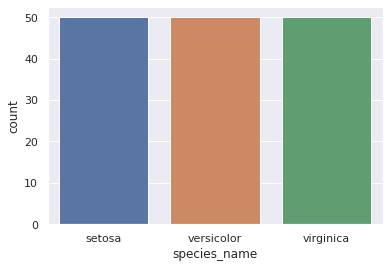

In [19]:
sns.countplot(x = iris_dataframe["species_name"])

This dataset is a balanced dataset as every category has same number of instances

## Species based on sepal Length and Width

<AxesSubplot:title={'center':'Various species based on sepal length and width'}, xlabel='sepalLength', ylabel='sepalWidth'>

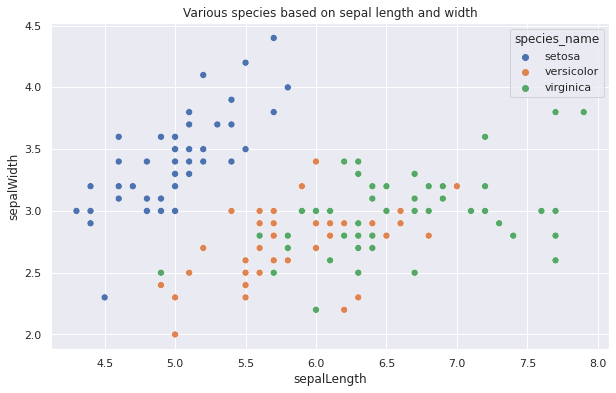

In [20]:
plt.figure(figsize=(10,6))
plt.title("Various species based on sepal length and width")
sns.scatterplot(x = iris_dataframe["sepalLength"], y = iris_dataframe["sepalWidth"],hue =iris_dataframe["species_name"],s=50)

- 0 (Setosa) species has smaller sepal length but large sepal width
- 1 (Versicolor) is in almost middle phase in the plot
- 2 (Virginica) has larger sepal lengths and small sepal widths, which is just reversed of the setosa

## Species based on petal Length and Width

<AxesSubplot:title={'center':'Various species based on petal length and width'}, xlabel='petalLength', ylabel='petalWidth'>

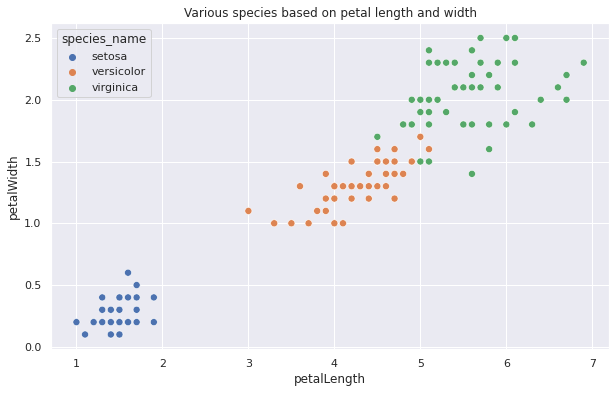

In [21]:
plt.figure(figsize=(10,6))
plt.title("Various species based on petal length and width")
sns.scatterplot(x = iris_dataframe["petalLength"], y = iris_dataframe["petalWidth"],hue =iris_dataframe["species_name"],s=50)

- 0 (Setosa) species have the smallest petal length and width
- 1 (Versicolor) is also in the middle phase here
- 2 (Virginica) has the largest petal length and petal width

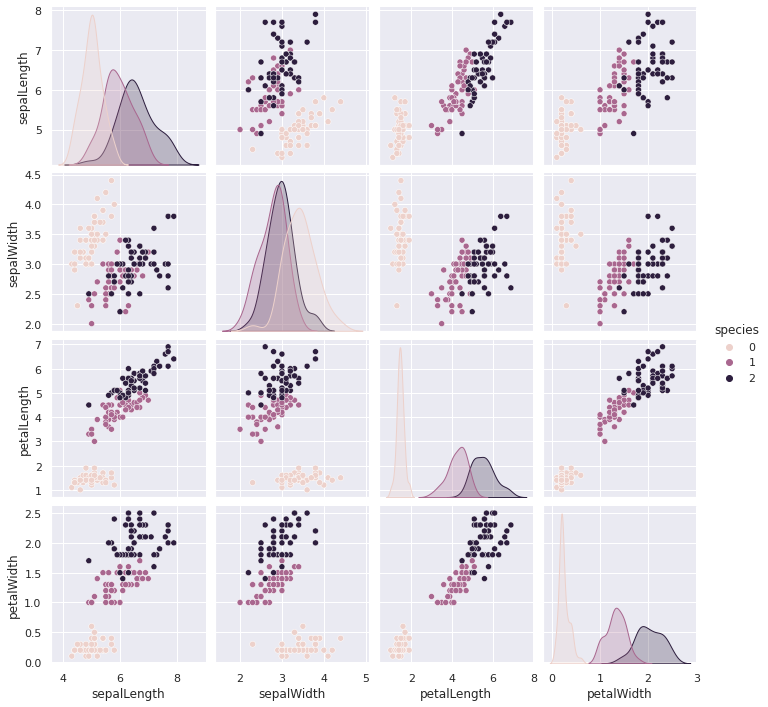

In [22]:
sns.pairplot(iris_dataframe, hue="species")
plt.show()

From above we can infer:
- The distributions show there is very less overlapping in the petal length and petal width, so we can take them as classification features.
    - 0 (Setosa): sepal width is high, but sepal length, petal length and width is small
    - 1 (Versicolor): average petal and sepal dimensions
    - 2 (Virginica): petal length and width, sepal length is large, but sepal width is low
- There is a high correlation between petal length and petal width columns. We can look into the correlation more closely by plotting on a heatmap.

## Plotting Correlation

[]

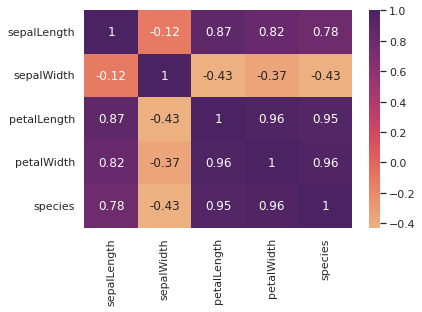

In [23]:
# Pearson correlation
sns.heatmap(iris_dataframe.corr(), annot=True, cmap='flare')
plt.plot()

- High positive correlation between petalWidth and petalLength (0.96)

- High positive correlation between petalLength and sepalLength (0.87)

- High positive correlation between petalWidth and sepalLength (0.82)

## Visualizing using Box plots 
Visualizing the distribution , mean and median using box plots

In [24]:
iris_dataframe.groupby(["species"]).agg(["mean", "median"])

sepalLength        sepalWidth        petalLength        petalWidth  \
               mean median       mean median        mean median       mean   
species                                                                      
0             5.006    5.0      3.428    3.4       1.462   1.50      0.246   
1             5.936    5.9      2.770    2.8       4.260   4.35      1.326   
2             6.588    6.5      2.974    3.0       5.552   5.55      2.026   

                
        median  
species         
0          0.2  
1          1.3  
2          2.0

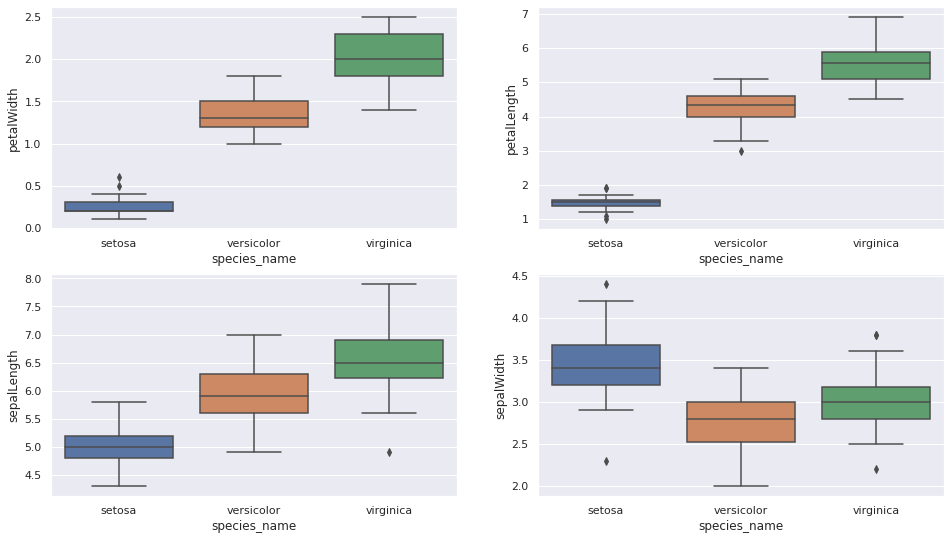

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x= "species_name", y="petalWidth", data=iris_dataframe, orient="v", ax=axes[0, 0])
sns.boxplot(x= "species_name", y="petalLength", data=iris_dataframe, orient="v", ax=axes[0, 1])
sns.boxplot(x= "species_name", y="sepalLength", data=iris_dataframe, orient="v", ax=axes[1, 0])
sns.boxplot(x= "species_name", y="sepalWidth", data=iris_dataframe, orient="v", ax=axes[1, 1])
plt.show()

- 0 (Setosa): smaller features, less distributed
- 1 (Versicolor): average features, also distributed in a average manner
- 2 (Virginica): large no .of values and features, highly distributed 

## Visualizing using Histogram & Probability Density Function (PDF)

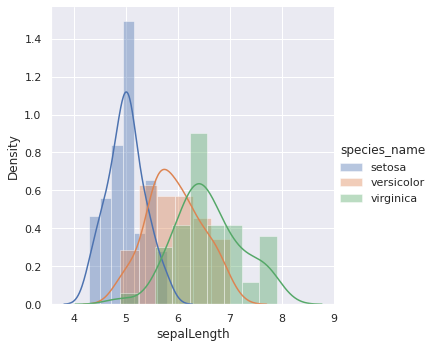

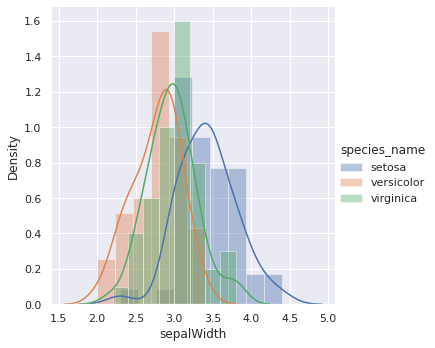

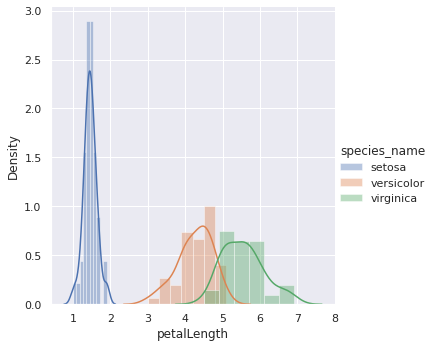

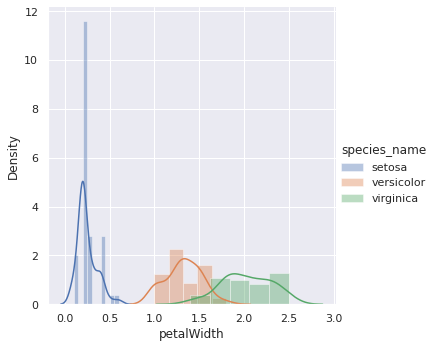

In [108]:
sns.FacetGrid(iris_dataframe, hue="species_name", height=5).map(sns.distplot, "sepalLength").add_legend()
sns.FacetGrid(iris_dataframe, hue="species_name", height=5).map(sns.distplot, "sepalWidth").add_legend()
sns.FacetGrid(iris_dataframe, hue="species_name", height=5).map(sns.distplot, "petalLength").add_legend()
sns.FacetGrid(iris_dataframe, hue="species_name", height=5).map(sns.distplot, "petalWidth").add_legend()
plt.show()

- Plot 1 and 2 show that there is a significant amount of overlap between the species on sepal length and width, so it is not an effective Classification feature
- Plot 3 and 4 illustrate that petal length and width is a good Classification feature as it clearly separates the species, the overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two
    - If petal length < 2.1, then species is Setosa
    - The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
    - If petal length > 2.1 and petal length < 4.8 then species is Versicolor
    - If petal length > 4.8 then species is Virginica

# Statistical Model

In [27]:
# Ordinary least squares Regression Results
model=sm.OLS(y,X)
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   3.17e-112
Time:                        16:25:25   Log-Likelihood:                          17.009
No. Observations:                 150   AIC:                                     -26.02
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0845      0.049     -1.720      0.088      -0.182       0.013
x2            -0.0236      0.057     -0.415      0.679      -0.136       0.089
x3             0.2249      0.057      3.968      0.000       0.113       0.337
x4             0.5997      0.094      6.392      0.000       0.414       0.785
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.128
Skew:                          -0.026   Prob(JB):                        0.938
Kurtosis:                       3.133   Cond. No.                         50.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check normal distribution of variables 

## Shapiro-Wilk test

Shapiro-Wilk test is a statistical test for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

***Null hypothesis:- data was drawn from normal distribution***

***Alternate hypothesis:- data was not drawn from normal distribution***

In [28]:
from scipy.stats import shapiro
for i in df_iris.columns:
    print(f'{i}: {"Not Gaussian: reject null hypothesis" if shapiro(df_iris[i])[1]<0.05 else "Gaussian: fail to reject null hypothesis"} {shapiro(df_iris[i])}')

sepalLength: Not Gaussian: reject null hypothesis ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)
sepalWidth: Gaussian: fail to reject null hypothesis ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)
petalLength: Not Gaussian: reject null hypothesis ShapiroResult(statistic=0.8762688040733337, pvalue=7.412849778454245e-10)
petalWidth: Not Gaussian: reject null hypothesis ShapiroResult(statistic=0.9018339514732361, pvalue=1.6802413682626138e-08)


**Only variable 'sepalWidth' is a normal distribution.**

# Binning to create Contingency Table

**Binning transforms numerical variables into categorical ones.**

In [29]:
pcts = [0, .25, .5, .75, 1]
iris_binned = pd.concat(
[pd.qcut(iris_dataframe.iloc[:,0], pcts, precision=1),
pd.qcut(iris_dataframe.iloc[:,1], pcts, precision=1),
pd.qcut(iris_dataframe.iloc[:,2], pcts, precision=1),
pd.qcut(iris_dataframe.iloc[:,3], pcts, precision=1)],
join='outer', axis = 1)

In [30]:
print(iris_binned['petalLength'].value_counts())

(0.9, 1.6]    44
(4.4, 5.1]    41
(5.1, 6.9]    34
(1.6, 4.4]    31
Name: petalLength, dtype: int64


In [31]:
iris_binned.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150,150,150,150
unique,4,4,4,4
top,"(4.2, 5.1]","(1.9, 2.8]","(0.9, 1.6]","(0.0, 0.3]"
freq,41,47,44,41


## Contingency Table Example

In [81]:
print(pd.crosstab(iris_dataframe['species'],iris_binned['petalLength']))

petalLength  (0.9, 1.6]  (1.6, 4.4]  (4.4, 5.1]  (5.1, 6.9]
species                                                    
0                    44           6           0           0
1                     0          25          25           0
2                     0           0          16          34


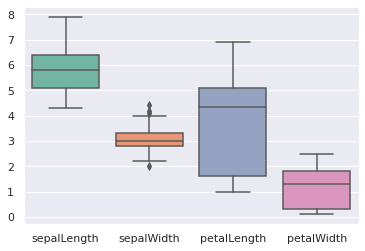

In [50]:
ax = sns.boxplot(data=df_iris, orient="v", palette="Set2")

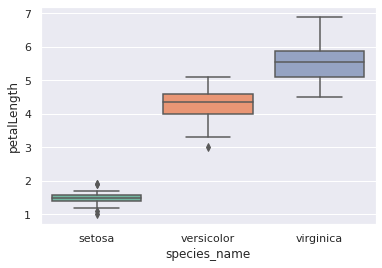

In [51]:
ax = sns.boxplot(x='species_name',y='petalLength',data=iris_dataframe, orient="v", palette="Set2")

**Boxplots are also extremely useful for visually checking group differences.**

**Above boxplot shows that the three groups (setosa,versicolor, and virginica) have different petal lengths, with only partially overlapping values at the last two of them.**

**After we have spotted a possible group difference relative to a variable like we spot in petalLength groupwise boxplot figure above, we can statistically verify the same using t-test or ANOVA test.**

**To compare two groups, we can use t-tests and for more than two groups, we can use ANOVA test.**

# t-tests

In [63]:
setosa = iris_dataframe['species_name'] == 'setosa'
versicolor = iris_dataframe['species_name'] == 'versicolor'
virginica = iris_dataframe['species_name'] == 'virginica'
variable = iris_dataframe['petalLength']
print(f'var0 {variable[setosa].var()} var1 {variable[versicolor].var()} var2 {variable[virginica].var()}')

var0 0.030159183673469384 var1 0.22081632653061228 var2 0.30458775510204084


**The t-test compares two groups at a time, and it requires that we define whether the groups have similar variance or not. Therefore, it is necessary to calculate the variance beforehand like we did above.**

In [64]:
variable = iris_dataframe['petalLength'] #petal length
t, pvalue = stats.ttest_ind(variable[versicolor], variable[virginica],axis=0, equal_var=False)
print(f't stat {t} p-value {pvalue}')

t stat -12.603779441384987 p-value 4.900287527398095e-22


In [65]:
variable = iris_dataframe['sepalWidth'] #sepal width
t, pvalue = stats.ttest_ind(variable[versicolor], variable[virginica],axis=0, equal_var=False)
print(f't stat {t} p-value {pvalue}')

t stat -3.2057607502218186 p-value 0.001819483482104968


In [93]:
variable = iris_dataframe['petalWidth'] #petal width
t, pvalue = stats.ttest_ind(variable[versicolor], variable[virginica],axis=0, equal_var=False)
print(f't stat {t} p-value {pvalue}')

t stat -14.625367047410148 p-value 2.111534400988573e-25


In [94]:
variable = iris_dataframe['sepalLength'] #sepal length
t, pvalue = stats.ttest_ind(variable[versicolor], variable[virginica],axis=0, equal_var=False)
print(f't stat {t} p-value {pvalue}')

t stat -5.629165259719801 p-value 1.8661443873771216e-07


**When p value is below 0.05, we can confirm that the groups’ means are significantly different for all the four features.**

> We can also verify below criteria:

### T-test of each sepalWidth vs target
***Null hypothesis:- 'sepalWidth' is not significant for identifying an iris flow species(target)***

***Alternate hypothesis:- 'sepalWidth' is significant for identifying an iris flow species(target)***

In [77]:
stats.ttest_ind(X[:,1],y) # Independent t-test - sepalWidth vs target

Ttest_indResult(statistic=27.15303402964298, pvalue=1.4182422887115277e-82)

**The Independent t-test results are significant because p-value is very small. So, we can reject the null hypothesis in support of the alternative hypothesis.**

### T-test of each feature vs target
***Null hypothesis:- Feature is not significant for identifying an iris flow species(target)***

***Alternate hypothesis:- Feature is significant for identifying an iris flow species(target)***

In [78]:
t_test,p=stats.ttest_ind(X,y)
p

array([4.39761393e-149, 1.41824229e-082, 4.03930219e-047, 2.99117550e-002])

In [79]:
for i in range(X.shape[1]):
    t_test,p=stats.ttest_ind(X[:,i],y) # every feature vs target
    if p>0.05:
        print(f"{i}: Not significant feature  (Fail to reject the null hypothesis)")
    else:
        print(f"{i}: Significant feature (Reject null hypothesis)")

0: Significant feature (Reject null hypothesis)
1: Significant feature (Reject null hypothesis)
2: Significant feature (Reject null hypothesis)
3: Significant feature (Reject null hypothesis)


**All input features (sepal length, sepal width, petal length and petal width) are statistically significant in identifying the target variable i.e species of iris flower.**

> **We can simultaneously check more than two groups using the one-way ANOVA test.**

# Analysis of variance

## One-way ANOVA test
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.

***Null hypothesis:- For variable 'sepalWidth' , the species groups have the same mean***

***Alternate hypothesis:- For variable 'sepalWidth' , the species groups don't have the same mean***

In iris dataset we have only one independent variable i.e. Species so we are doing one-way Anova testing. Here, Species (setosa, versicolor and virginica) is a categorical variable and we took 'sepalWidth' as a continous variable. For eg, if someone wants to look at 'sepalWidth' of setosa, versicolor and virginica,there would be three species(or groups) for analysis.

In [67]:
variable = iris_dataframe['sepalWidth']
f, pvalue = stats.f_oneway(variable[setosa],variable[versicolor],variable[virginica])
print(f'One-way ANOVA F-value {f} p-value {pvalue}')

One-way ANOVA F-value 49.160040089612075 p-value 4.492017133309115e-17


In [72]:
alpha=0.05
if p>alpha:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis")

Reject null hypothesis


**As p-value is below 0.05, we can confirm that the groups’ means are significantly different**

> We can also verify below criteria:

***Null hypothesis:- 'sepalWidth' and iris flow species(target) have the same population mean***

***Alternate hypothesis:- 'sepalWidth' and iris flow species(target) don't have the same population mean***

In [75]:
stat,p=stats.f_oneway(X[:,1],y)
print(stat,p)

737.2872570149498 1.418242288711535e-82


In [76]:
for i in range(X.shape[1]):
    t_test,p=stats.f_oneway(X[:,i],y)
    if p>alpha:
        print(f"{i}: Fail to reject null hypothesis")
    else:
        print(f"{i}: Reject null hypothesis")

0: Reject null hypothesis
1: Reject null hypothesis
2: Reject null hypothesis
3: Reject null hypothesis


# Chi-Squared test

**This test is applicable to both categorical and numeric data (after it has been converted into bins). So, we did binning above to convert our numeric data into categorical data**

In [89]:
table = pd.crosstab(iris_dataframe['species_name'],iris_binned['petalLength']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 212.43115656963022 p-value 4.27251923637096e-43


**The p-value is the chance that the chi-square difference is just by chance. The high chi-square value and the significant p-value are signaling that the petal length variable can be effectively used for distinguishing between Iris species.**

In [90]:
table = pd.crosstab(iris_dataframe['species_name'],iris_binned['petalWidth']) # Contigency table
chi2, p, dof, expected = chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 203.55618776671412 p-value 3.3200733730590266e-41


In [91]:
table = pd.crosstab(iris_dataframe['species_name'],iris_binned['sepalLength']) # Contigency table
chi2, p, dof, expected = chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 111.27097292950951 p-value 1.1043274827856348e-21


In [92]:
table = pd.crosstab(iris_dataframe['species_name'],iris_binned['sepalWidth']) # Contigency table
chi2, p, dof, expected = chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 70.23199156603411 p-value 3.6645345750149437e-13


**By above experiment, we can conclude that all the four features are statistically significant in distinguishing between iris species**

# Conclusion

* We have four numerical columns and just one categorical column which is our target column
* This dataset is a balanced dataset as every category has same number of instances
* Very high correlation is there between petal length and petal width
* The setosa species is the most easily distinguishable because it is less distributed
* The versicolor and virginica species are difficult to distinguised due to the overlapping of attributes
* All input features (sepal length, sepal width, petal length and petal width) are statistically significant in distinguishing the species of iris flower
* The three species (setosa,versicolor, and virginica) have different petal lengths, with only partially overlapping values at the last two of them
* We have verified that the species’ means are significantly different for all the four input features